# German Housing Prices vs Inflation Rate (2005–2025)

#### Goal: Explore how inflation trends relate to housing price changes in Germany (GREIX dataset)

In [2]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

#Display settings
pd.set_option("display.float_format", lambda x: f"{x:,.2f}")
sns.set_theme(style="whitegrid", palette="Set2")


### Load Data

In [7]:
# 1. GREIX housing prices (yearly average)
greix = pd.read_excel("Data/GREIX_all_cities_data.xlsx")

# 2. Inflation rate data (World Bank format)
infl = pd.read_excel("Data/Inflation rate_consumer price.xls", skiprows=5)

# Preview first few rows
print("GREIX sample:")
display(greix.head())

print("Inflation dataset sample:")
display(infl.head())


GREIX sample:


,Year,Quarter,City,Property_Type,Index,Price,Inflation
0,1963,1.00,Hamburg,Single-family house,NaN,"1,200.00",1
1,1963,1.00,Hamburg,Single-family house,NaN,400.00,0
2,1963,2.00,Hamburg,Single-family house,NaN,300.00,0
3,1963,2.00,Hamburg,Single-family house,NaN,"1,100.00",1
4,1963,3.00,Hamburg,Single-family house,NaN,400.00,0


Inflation dataset sample:


,Africa Eastern and Southern,AFE,"Inflation, consumer prices (annual %)",FP.CPI.TOTL.ZG,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,5.25,6.60,6.40,4.72,4.64,5.41,7.24,10.77,7.13,4.43
0,Afghanistan,AFG,"Inflation, consumer prices (annual %)",FP.CPI.TOTL.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.66,4.38,4.98,0.63,2.30,5.60,5.13,13.71,-4.64,-6.60
1,Africa Western and Central,AFW,"Inflation, consumer prices (annual %)",FP.CPI.TOTL.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,2.13,1.49,1.73,1.78,1.98,2.49,3.75,7.93,5.49,3.62
2,Angola,AGO,"Inflation, consumer prices (annual %)",FP.CPI.TOTL.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,9.36,30.69,29.84,19.63,17.08,22.27,25.75,21.36,13.64,28.24
3,Albania,ALB,"Inflation, consumer prices (annual %)",FP.CPI.TOTL.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,1.90,1.28,1.99,2.03,1.41,1.62,2.04,6.73,4.76,2.21
4,Andorra,AND,"Inflation, consumer prices (annual %)",FP.CPI.TOTL.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Cleaing & Preprocessing 

In [9]:
# Load the Inflation Data correctly
infl = pd.read_excel("Data/Inflation rate_consumer price.xls", skiprows=3)

# Filter Germany and clean
inflation_germany = infl[infl.iloc[:, 0] == "Germany"].copy()

# Drop non-year columns
inflation_germany = inflation_germany.drop(columns=inflation_germany.columns[:4])

# Transpose so that years become rows
inflation_germany = inflation_germany.T.reset_index()

# Rename columns properly
inflation_germany.columns = ["Year", "Inflation (%)"]

# Convert types
inflation_germany["Year"] = pd.to_numeric(inflation_germany["Year"], errors="coerce")
inflation_germany["Inflation (%)"] = pd.to_numeric(inflation_germany["Inflation (%)"], errors="coerce")

# Drop missing rows
inflation_germany = inflation_germany.dropna(subset=["Year", "Inflation (%)"])

print("Cleaned Germany Inflation Data:")
display(inflation_germany.head(10))


Cleaned Germany Inflation Data:


,Year,Inflation (%)
0,1960,1.54
1,1961,2.29
2,1962,2.84
3,1963,2.97
4,1964,2.34
5,1965,3.24
6,1966,3.53
7,1967,1.80
8,1968,1.47
9,1969,1.91


### Focus only on the national average (GREIX)

In [13]:
# Keep only national data
greix_national = greix[greix["City"] == "GREIX"].copy()

# Group by year and calculate average price
yearly_prices = greix_national.groupby("Year", as_index=False)["Price"].mean()
yearly_prices.rename(columns={"Price": "Average_Price (€)"}, inplace=True)

print("GREIX yearly housing price data:")
display(yearly_prices.head())


GREIX yearly housing price data:


,Year,Average_Price (€)
0,1965,650.00
1,1966,666.67
2,1967,716.67
3,1968,733.33
4,1969,750.00


### Clean and prepare the inflation dataset

In [14]:
# Select the Germany row
inflation_germany = infl[infl.iloc[:, 0] == "Germany"].copy()

# Drop unnecessary meta columns
inflation_germany = inflation_germany.drop(columns=inflation_germany.columns[:4])

# Transpose to make years into rows
inflation_germany = inflation_germany.T.reset_index()

# Rename columns and fix datatypes
inflation_germany.columns = ["Year", "Inflation (%)"]
inflation_germany["Year"] = pd.to_numeric(inflation_germany["Year"], errors="coerce")
inflation_germany["Inflation (%)"] = pd.to_numeric(inflation_germany["Inflation (%)"], errors="coerce")
inflation_germany.dropna(subset=["Year", "Inflation (%)"], inplace=True)

print("Cleaned Germany inflation data:")
display(inflation_germany.head())


Cleaned Germany inflation data:


,Year,Inflation (%)
0,1960,1.54
1,1961,2.29
2,1962,2.84
3,1963,2.97
4,1964,2.34


### Merge datasets

In [15]:
merged_data = pd.merge(yearly_prices, inflation_germany, on="Year", how="inner")

print("Merged dataset preview:")
display(merged_data.head())


Merged dataset preview:


,Year,Average_Price (€),Inflation (%)
0,1965,650.00,3.24
1,1966,666.67,3.53
2,1967,716.67,1.80
3,1968,733.33,1.47
4,1969,750.00,1.91


### Visualizing inflation and housing price trends

Exploring how inflation trends align with long-term changes in property values

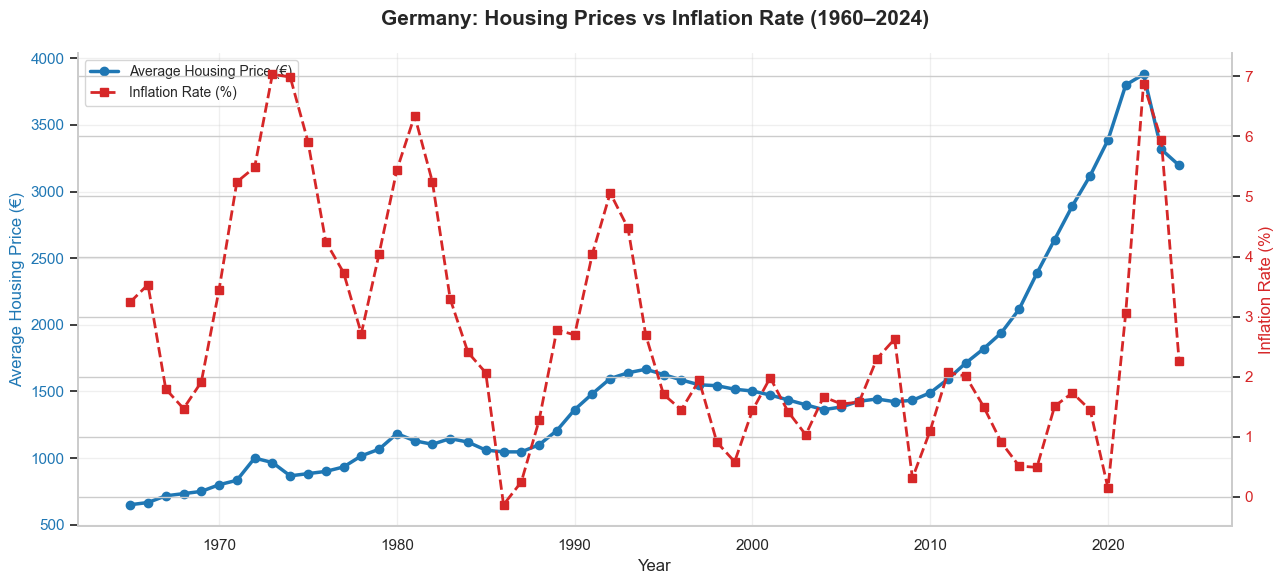

In [ ]:
sns.set_theme(style="whitegrid")

fig, ax1 = plt.subplots(figsize=(13, 6))

# Plot housing prices
line1, = ax1.plot(
    merged_data["Year"],
    merged_data["Average_Price (€)"],
    color="#1f77b4",
    marker="o",
    linewidth=2.5,
    label="Average Housing Price (€)"
)

ax1.set_xlabel("Year", fontsize=12)
ax1.set_ylabel("Average Housing Price (€)", color="#1f77b4", fontsize=12)
ax1.tick_params(axis='y', labelcolor="#1f77b4")

# Plot inflation rate
ax2 = ax1.twinx()
line2, = ax2.plot(
    merged_data["Year"],
    merged_data["Inflation (%)"],
    color="#d62728",
    marker="s",
    linestyle="--",
    linewidth=2,
    label="Inflation Rate (%)"
)

ax2.set_ylabel("Inflation Rate (%)", color="#d62728", fontsize=12)
ax2.tick_params(axis='y', labelcolor="#d62728")

# Title and subtitle
plt.title(
    "Germany: Housing Prices vs Inflation Rate (1960–2024)",
    fontsize=15, fontweight="bold", pad=20
)

# Combine legends manually to avoid duplicates
lines = [line1, line2]
labels = [line.get_label() for line in lines]
ax1.legend(lines, labels, loc="upper left", frameon=True, facecolor="white", fontsize=10)

# Styling
ax1.grid(alpha=0.3)
sns.despine(right=False, left=False)
plt.tight_layout()
plt.show()


While inflation moved in sharp cycles over time, housing prices followed a more gradual upward trend. Periods of high inflation, such as the 1970s and the post-COVID years (2021–2023), often coincided with noticeable increases in housing prices, suggesting a partial connection between rising consumer prices and property values.

However, the relationship is not perfectly aligned. There are years where inflation fell but housing prices continued to grow, especially after 2010. This indicates that although inflation influences housing prices, it is not the sole driver—its impact appears moderate and often delayed, reflecting a broader and more complex economic interaction between the two

### Relationship between Inflation Rate and Housing Prices

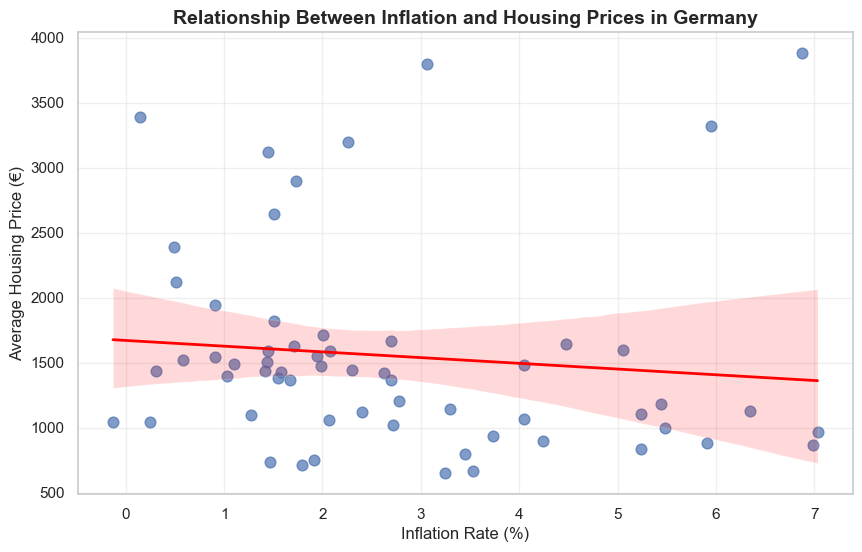

In [33]:
plt.figure(figsize=(10,6))
sns.regplot(
    data=merged_data,
    x="Inflation (%)",
    y="Average_Price (€)",
    scatter_kws={"s":60, "alpha":0.7},
    line_kws={"color":"red", "lw":2}
)
plt.title("Relationship Between Inflation and Housing Prices in Germany", fontsize=14, fontweight="bold")
plt.xlabel("Inflation Rate (%)")
plt.ylabel("Average Housing Price (€)")
plt.grid(True, alpha=0.3)
plt.show()


This scatter plot examines how inflation rates align with housing prices in Germany over time. During periods of higher inflation, housing prices did not necessarily rise at the same pace. In fact, prices sometimes slowed or stabilized even when inflation was high. This weak correlation suggests that while inflation influences the general cost of living, housing prices in Germany are shaped by broader economic factors